# Fitbit data analysis

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#import dataset
df=pd.read_csv(r"C:\Users\MIDHILA ELIZABATH\Downloads\archive (10)\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

In [6]:
df.shape

(940, 15)

In [7]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [10]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

# Cleaning Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [15]:
#check for duplicates
df.duplicated().sum()

0

In [30]:
#find the total number of users
df['Id'].nunique()

33

In [18]:
pd.isnull(df).sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [19]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [22]:
#check if total distance and tracker distance is same
df['TotalDistance'].equals(df['TrackerDistance'])

False

In [25]:
#create a column with total minutes
df['TotalMinutes']=df.VeryActiveMinutes+df.FairlyActiveMinutes+df.LightlyActiveMinutes+df.SedentaryMinutes
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,2016-04-12,13162,8.49,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.97,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.75,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.23,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.16,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.08,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,20226,18.19,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,10733,8.09,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,21420,19.52,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


In [64]:
#find out the days in which people walk the most
df['Dayofweek']=df.ActivityDate.dt.day_name()
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Activitydate,Day_of_week,Dayofweek
0,1503960366,2016-04-12,13162,8.49,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094,Tuesday,Tuesday,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033,Wednesday,Wednesday,Wednesday
2,1503960366,2016-04-14,10460,6.75,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440,Thursday,Thursday,Thursday
3,1503960366,2016-04-15,9762,6.23,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998,Friday,Friday,Friday
4,1503960366,2016-04-16,12669,8.16,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040,Saturday,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.08,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440,Sunday,Sunday,Sunday
936,8877689391,2016-05-09,20226,18.19,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440,Monday,Monday,Monday
937,8877689391,2016-05-10,10733,8.09,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440,Tuesday,Tuesday,Tuesday
938,8877689391,2016-05-11,21420,19.52,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440,Wednesday,Wednesday,Wednesday


# Analysis

In [65]:
df.columns


Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutes',
       'Activitydate', 'Day_of_week', 'Dayofweek'],
      dtype='object')

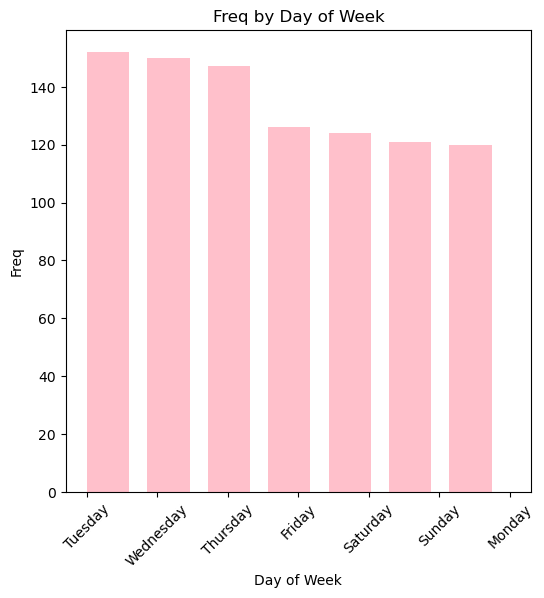

In [80]:
plt.figure(figsize=(6, 6))
plt.hist(data=df,x="Day_of_week", bins=7, color='pink', width=0.6)


plt.xlabel('Day of Week')
plt.ylabel('Freq')
plt.xticks(rotation = 45)
plt.title('Freq by Day of Week');

###### Here we can see that the activity is decreasing from friday to monday

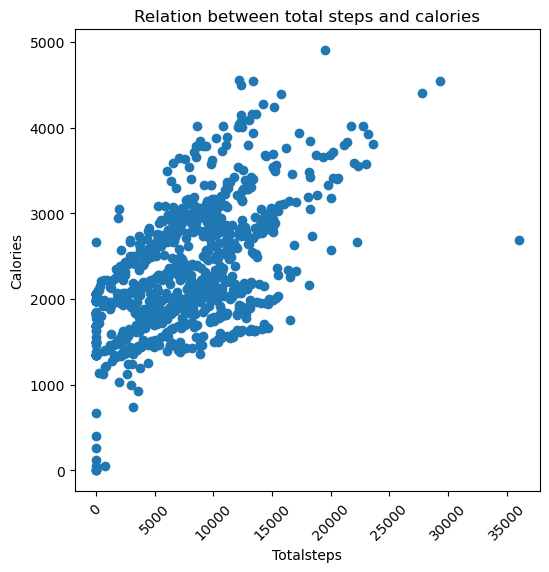

In [90]:
#plot to find the relation between total steps and calories
plt.figure(figsize=(6, 6))
plt.scatter(data=df,x="TotalSteps",y='Calories')


plt.xlabel('Totalsteps')
plt.ylabel('Calories')
plt.xticks(rotation = 45)
plt.title('Relation between total steps and calories');

##### The total steps and calories burned have a positive corelation

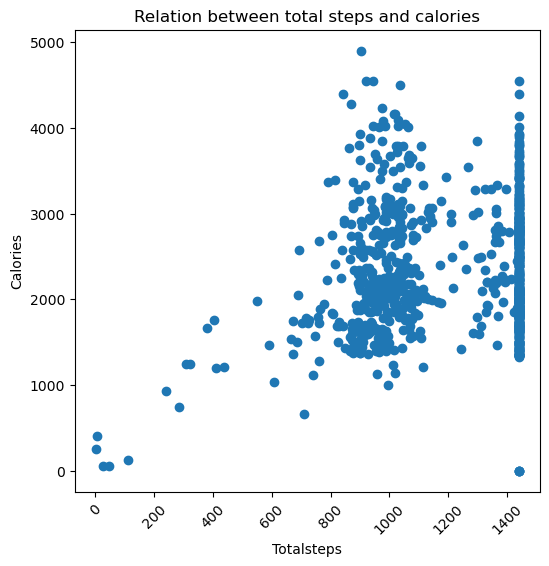

In [92]:
#Relation between the total time and calories
#plot to find the relation between total steps and calories
plt.figure(figsize=(6, 6))
plt.scatter(data=df,x="TotalMinutes",y='Calories')


plt.xlabel('Totalsteps')
plt.ylabel('Calories')
plt.xticks(rotation = 45)
plt.title('Relation between total steps and calories');

###### The total minutes spend on activity and calories burned doesnot have any relation.So we have to find if there is any relation between the calories and activity type

In [97]:
df.columns


Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutes',
       'Activitydate', 'Day_of_week', 'Dayofweek'],
      dtype='object')

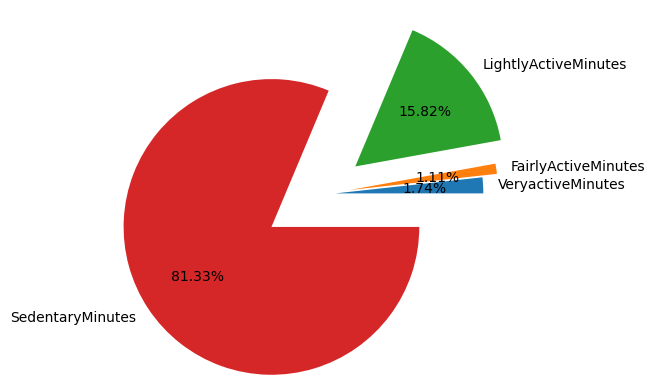

In [133]:
#time spend on each type of activity
FairlyActiveMinutes = df['FairlyActiveMinutes'].sum()
VeryActiveMinutes = df['VeryActiveMinutes'].sum()
LightlyActiveMinutes = df['LightlyActiveMinutes'].sum()
SedentaryMinutes = df['SedentaryMinutes'].sum()
    
minutes = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ['VeryactiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']


plt.pie(minutes, labels=labels, autopct='%1.2f%%', explode = (0.1, 0.2, 0.3, 0.4) );

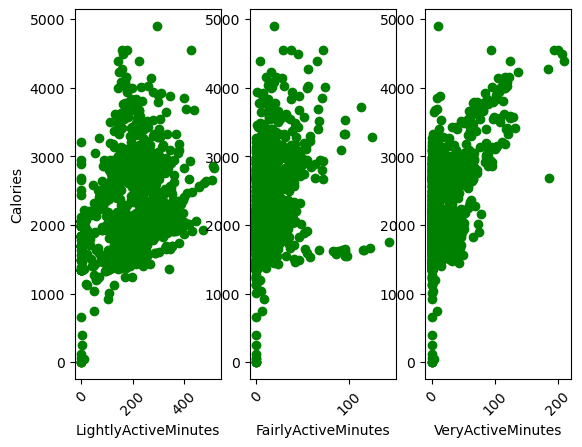

In [123]:
#relation between different type of activity and calories
t=np.arange(0, 8, 0.6)
plt.subplot(131)
plt.scatter(data=df,x="LightlyActiveMinutes",y='Calories',color='green')
plt.xlabel('LightlyActiveMinutes')
plt.ylabel('Calories')
plt.xticks(rotation = 45)
;

plt.subplot(132)
plt.scatter(data=df,x="FairlyActiveMinutes",y='Calories',color='green')
plt.xlabel('FairlyActiveMinutes')
plt.xticks(rotation = 45)
;

plt.subplot(133)
plt.scatter(data=df,x="VeryActiveMinutes",y='Calories',color='green')


plt.xlabel('VeryActiveMinutes')
plt.xticks(rotation = 45)
;



plt.show()

# Conclusion

Even though more calories are burned by very active minutes the chart shows that very less people are involved in it.majority of people calculate their steps from light activities.